In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
PATH = "./measurements/full-x4"

In [79]:
fechas=['2021-11-19_17-55-37','2021-11-27_16-16-53']
data=[]

for i in fechas:
    data.append(pd.read_csv(f"{PATH}/{i}/figuras/area_{i}.csv"))
    
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_0-280.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_280-525.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_525-569.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_570-663.csv"))

data.append(pd.read_csv(f"{PATH}/areasfinales/areas_955-990.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_991-1134.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_1180-1200.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_1222-1237.csv"))

In [80]:
data=pd.concat(data)

In [81]:
data

,# nro,Area1,Area2,Area3,Area4
0,1.0,861577.5,680407.0,999943.0,373595.5
1,2.0,777764.5,680266.5,1013391.5,417690.5
2,3.0,661939.0,633581.0,1001593.5,437191.5
3,4.0,494296.5,354747.5,593983.0,690197.0
4,5.0,1007897.0,743866.5,1160173.0,766309.0
5,6.0,1090384.5,575843.0,1297863.0,734609.0
6,7.0,1034822.5,574966.0,1721639.0,730399.0
7,8.0,983064.0,542898.5,2161321.0,703354.5
8,9.0,933170.5,481938.5,2209964.0,678543.5
9,10.0,854629.0,480621.5,1924268.0,693415.0


In [84]:
dt=1/4

long=39

x1= np.arange(0,long/4,dt)
x2=(np.array([1,2,3,4,5,6,7,8,9,10,11,12+4,13+4,14+4,15+4,16+4,17+4,18+4]) + long)/4 #,8,9,10,11, 16,17,18,19,20,21,22,23,24])+long)/4
#x2=(np.array([5,6,7,8,9,10,11,12,13])+long)/4

x=np.concatenate([x1,x2])

In [85]:
len(x)

57

In [86]:
len(data)

57

In [87]:
#LA CONCENTRACION EN 25MIN:

#area1=np.array([data['Area1']])/60
#area2=np.array([data['Area2']])/60
#area3=np.array([data['Area3']])/60
#area4=np.array([data['Area4']])/60

c1=np.array([data['Area1']])/(25*60)
c2=np.array([data['Area2']])/(25*60)
c3=np.array([data['Area3']])/(25*60)
c4=np.array([data['Area4']])/(25*60)

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [88]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(C): #meter el área
    return F *C*6*60* 44 / (den)

#Se le introduce la CONCENTRACIÓN
#Se proyecta que eso emite durante 6h, pero como tiene que estar en minutos, se multiplica por 6*60

In [89]:
gramos1=gramos(c1)#area1))#*14.4
gramos2=gramos(c2)#area2))#*14.4
gramos3=gramos(c3)#area3))#*14.4
gramos4=gramos(c4)#area4))#*14.4

In [90]:
#Gramos acumulados, suponiendo que ese valor se produjo durante 6h
gramos1_ac=np.add.accumulate(gramos1[0])
gramos2_ac=np.add.accumulate(gramos2[0])
gramos3_ac=np.add.accumulate(gramos3[0])
gramos4_ac=np.add.accumulate(gramos4[0])

In [91]:
gramos1[0]

array([0.60887783, 0.54964708, 0.46779307, 0.34931991, 0.71228199,
       0.770576  , 0.73131027, 0.69473248, 0.65947268, 0.60396731,
       0.55498091, 0.75754655, 1.09873022, 0.85960833, 0.73782712,
       1.66218023, 1.36492052, 0.92037333, 0.72492593, 0.838202  ,
       0.59095659, 0.48008861, 0.44263203, 0.88110583, 2.1507231 ,
       1.80653631, 1.17967612, 0.82860606, 0.5462793 , 0.45759254,
       0.42391152, 0.82976576, 1.32461947, 0.88752586, 0.63632963,
       0.48774324, 0.48914781, 0.47282442, 0.48910682, 0.72453053,
       0.49619503, 0.44421363, 0.45129159, 1.56497278, 0.91720236,
       0.62375424, 0.62543053, 1.07135827, 0.62676161, 0.51030185,
       0.51942536, 0.71733172, 0.75176114, 0.61329506, 0.57005096,
       0.60709058, 0.56182743])

Vemos los errores:
$g= \frac{F CT *44}{22414 * 0.001 * 10^6}$

$\sigma_g ^2 = ( \frac{CT *44}{22414 * 0.001 * 10^6}\sigma_F )^2 + ( \frac{F *44}{22414 * 0.001 * 10^6}\sigma_{CT})^2$

In [92]:
def error(x): #INTRODUCIR LA CONCENTRACIÓN
    sigma_F=0.1
    sigma_A=50 + x*0.05
    A=sigma_F*x*6*60*44/den
    B=sigma_A*F*6*60*44/den
    return (A**2 + B**2)

In [93]:
error_g1=error(c1[0]) #var
error_g2=error(c2[0]) #var
error_g3=error(c3[0]) #var
error_g4=error(c4[0]) #var

In [94]:
error_g1_ac=np.add.accumulate(error_g1)
error_g2_ac=np.add.accumulate(error_g2)
error_g3_ac=np.add.accumulate(error_g3)
error_g4_ac=np.add.accumulate(error_g4)

Al ser acumulado y sumar siempre el anterior, el error será la suma en cuadratura

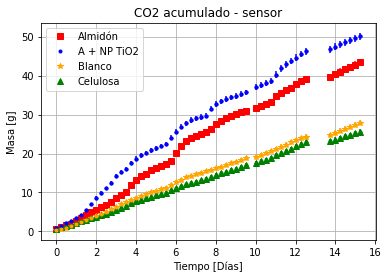

In [95]:
plt.plot(x,gramos1_ac,'s',label='Almidón',color='red')
plt.plot(x,gramos3_ac,'.',label='A + NP TiO2',color='blue')
plt.plot(x,gramos4_ac,'*',label='Blanco',color='orange')
plt.plot(x,gramos2_ac,'^',label='Celulosa',color='green')

plt.legend()

plt.errorbar(x,gramos1_ac,yerr=error_g1_ac**0.5,fmt='.',color='red')
plt.errorbar(x,gramos2_ac,yerr=error_g2_ac**0.5,fmt='.',color='green')
plt.errorbar(x,gramos3_ac,yerr=error_g3_ac**0.5,fmt='.',color='blue')
plt.errorbar(x,gramos4_ac,yerr=error_g4_ac**0.5,fmt='.',color='orange')

plt.title('CO2 acumulado - sensor')
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.savefig("co2_acumulado-sensor_segunda-medicion.png")
plt.show()

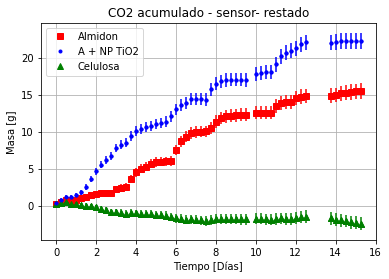

In [96]:
plt.errorbar(x,gramos1_ac-gramos4_ac,yerr=(error_g1_ac+error_g4_ac)**0.5,fmt='.',color='red')
plt.errorbar(x,gramos2_ac-gramos4_ac,yerr=(error_g2_ac+error_g4_ac)**0.5,fmt='^',color='green')
plt.errorbar(x,gramos3_ac-gramos4_ac,yerr=(error_g3_ac+error_g4_ac)**0.5,fmt='.',color='blue')

plt.plot(x,gramos1_ac-gramos4_ac,'s',label='Almidon',color='red')
plt.plot(x,gramos3_ac-gramos4_ac,'.',label='A + NP TiO2',color='blue')
plt.plot(x,gramos2_ac-gramos4_ac,'^',label='Celulosa',color='green')

plt.legend()

plt.title('CO2 acumulado - sensor- restado')
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.savefig("co2_acumulado-sensor_segunda-medicion-restado.png")
plt.show()